# ビデオ画像のリアルタイム取得を行う

In [1]:
from uikit.ui_uiview import *
# ビデオ画像のリアルタイム取得を行うためのモジュール
from avfoundation.video_data_capture_ex import *
import time

# 画面サイズを取得する
size = get_screen_bounds().size
# プレビュー表示用のUIViewを作成する
ui_view = create_uiview(
    rect=CGRect( CGPoint(size.width/4/2, size.height/4/2),
                 CGSize(3*size.width/4,  3*size.height/4) ),
    name='sample',
    color=UIColor.color(red=0,green=0,blue=0,alpha=1) )

In [2]:
# カメラ画像を入れておくリストを用意
npimages = []

# numpyアレイとしてカメラ画像が渡されると
# リストに追加する
def process_image( npimg ): 
    npimages.append( npimg )

In [3]:

myAVCaptureVideoData_Capture_Ex = AVCaptureVideoData_Capture_Ex(
        ui_view,      # 取得画像を表示するUIView
        'AVCaptureDeviceTypeBuiltInWideAngleCamera', # 取得デバイス
        AVCaptureDevicePositionBack,                 # カメラ位置
        'AVCaptureSessionPreset640x480',             # 取得画像サイズ
        CV32BGRA,                                    # 画像色フォーマット
        process_image                     # 取得画像へ処理を行うユーザ関数
        )
# 撮影開始
myAVCaptureVideoData_Capture_Ex.video_shooting_start(0.1) # 撮影インターバルを秒で指定
time.sleep(2) # 2秒間にわたり撮影を行う
# 撮影を終了する
myAVCaptureVideoData_Capture_Ex.video_shooting_close(ui_view)

videoSettings()
{
    PixelFormatType = 1111970369;
}
processed_frames:17


In [5]:
l = len(npimages)         # 取得した画像の枚数
h, w = npimages[0].shape  # 取得した画像の縦・横サイズ
print("{:d} images are captured.".format(l))
print("height:{:d} pixels x width:{:d} pixels".format(h, w))

17 images are captured.
height:480 pixels x width:2560 pixels


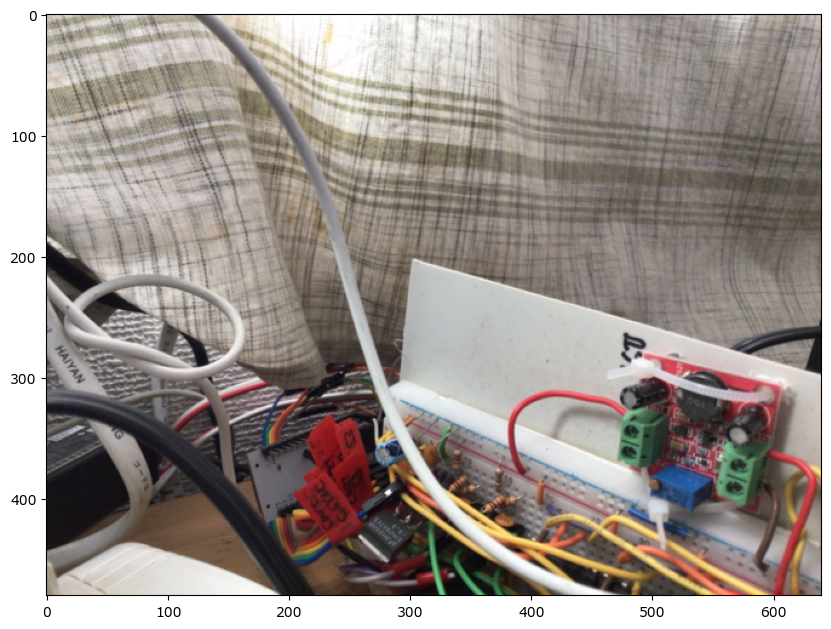

In [8]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

rgba_image = cv2.cvtColor( npimages[-1].reshape(h,int(w/4),4), cv2.COLOR_RGBA2BGRA)

# 画像を表示する
plt.figure(figsize=[10,10])
plt.imshow(rgba_image)

In [ ]:
# npimages.clear() # 必要に応じて消去

video_shooting_setup(ui_view,
    'AVCaptureDeviceTypeBuiltInWideAngleCamera', # 利用カメラ
    'AVCaptureSessionPreset640x480', # サイズフォーマット
    CV32BGRA,                        # 色フォーマット(指定しない:None)
    process_image)                   # 撮影画像を処理するユーザ関数

# 撮影開始
video_shooting_start(0.1) # 撮影インターバルを秒で指定
time.sleep(2) # 2秒間にわたり撮影を行う
# 撮影を終了する
video_shooting_close(ui_view)

In [ ]:
l = len(npimages)         # 取得した画像の枚数
h, w = npimages[0].shape  # 取得した画像の縦・横サイズ
print("{:d} images are captured.".format(l))
print("height:{:d} pixels x width:{:d} pixels".format(h, w))

In [ ]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

rgba_image = cv2.cvtColor( npimages[-1].reshape(h,w,4), cv2.COLOR_RGBA2BGRA)

# 画像を表示する
plt.figure(figsize=[10,10])
plt.imshow(rgba_image)